## 单变量线性回归

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
path = './exdata/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [ ]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12, 8))
plt.show()

### 梯度下降
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：${{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}$

In [ ]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

在training set添加一列，用于更新${θ_0}$

In [ ]:
data.insert(0, 'Ones', 1)

In [ ]:
data.head()

In [ ]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:, :-1]
y = data.iloc[:, cols-1:cols]

In [ ]:
X.head()

In [ ]:
y.head()

### 将X和y转换为numpy矩阵形式，并初始化${θ}$

In [ ]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0, 0])) #初始化为0

In [ ]:
X.shape, y.shape, theta.shape

In [ ]:
computeCost(X, y, theta)

## batch gradient decent（批量梯度下降）
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$

In [ ]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))      # 暂存更新的theta，为了同时更新各个theta值
    parameters = int(theta.ravel().shape[1])    # ravel将θ转为一维后取列数得出参数的个数
    cost = np.zeros(iters)                      # 各条数据的损失

    for i in range(iters):
        error = (X * theta.T) - y
        for j in range(parameters):
            temp[0, j] = theta[0, j] - ((alpha / len(X)) * np.sum(np.multiply(error, X[:, j])))
        theta = temp
        cost[i] = computeCost(X, y, theta)      # 同时更新theta
    return theta, cost

In [ ]:
alpha = 0.01
iters = 1500

In [ ]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

In [ ]:
computeCost(X, y, g)    # 计算拟合后的误差

In [ ]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

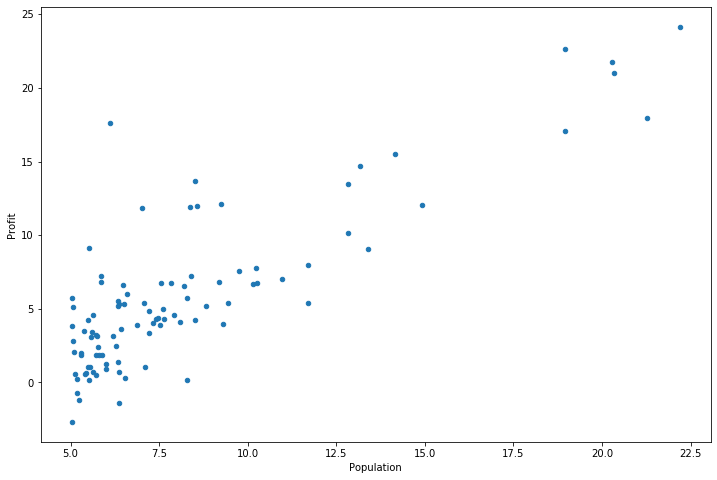

### 梯度下降
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：${{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}$

In [83]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

在training set添加一列，用于更新${θ_0}$

In [84]:
data.insert(0, 'Ones', 1)

In [85]:
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [86]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:, :-1]
y = data.iloc[:, cols-1:cols]

In [87]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [88]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


### 将X和y转换为numpy矩阵形式，并初始化${θ}$

In [89]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0, 0])) #初始化为0

In [90]:
X.shape, y.shape, theta.shape

((97, 2), (97, 1), (1, 2))

In [91]:
computeCost(X, y, theta)

32.072733877455676

## batch gradient decent（批量梯度下降）
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$

In [92]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))      # 暂存更新的theta，为了同时更新各个theta值
    parameters = int(theta.ravel().shape[1])    # ravel将θ转为一维后取列数得出参数的个数
    cost = np.zeros(iters)                      # 各条数据的损失

    for i in range(iters):
        error = (X * theta.T) - y
        for j in range(parameters):
            temp[0, j] = theta[0, j] - ((alpha / len(X)) * np.sum(np.multiply(error, X[:, j])))
        theta = temp
        cost[i] = computeCost(X, y, theta)      # 同时更新theta
    return theta, cost

In [93]:
alpha = 0.01
iters = 1500

In [94]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.63029144,  1.16636235]])

In [95]:
computeCost(X, y, g)    # 计算拟合后的误差

4.483388256587726

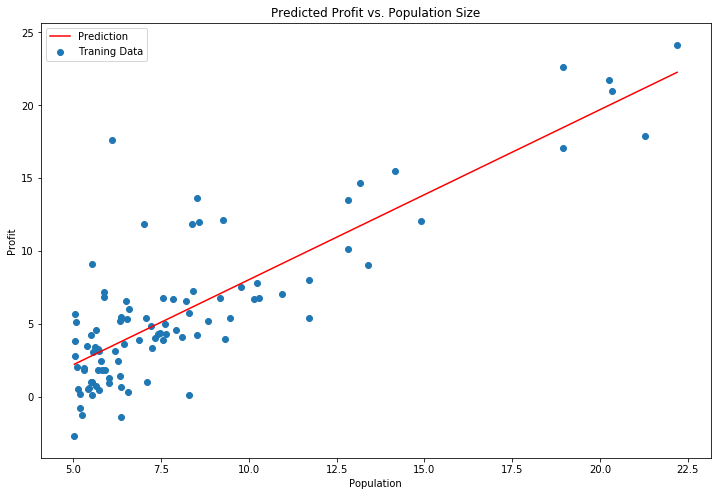

In [99]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

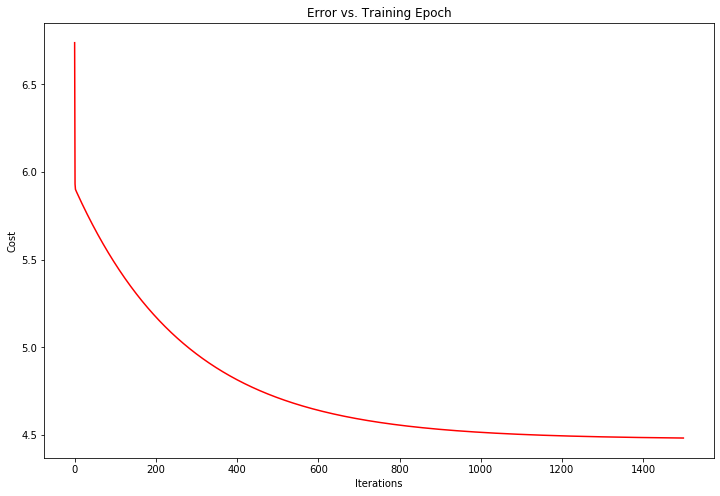

In [100]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()